In [255]:
import pandas as pd
import matplotlib.pyplot as plt

In [256]:
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)

In [257]:
df.shape

(1918, 6)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2023-07-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1916 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB


In [259]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1916.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,42.983299
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.760110
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,39.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [260]:
total_ridership = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()

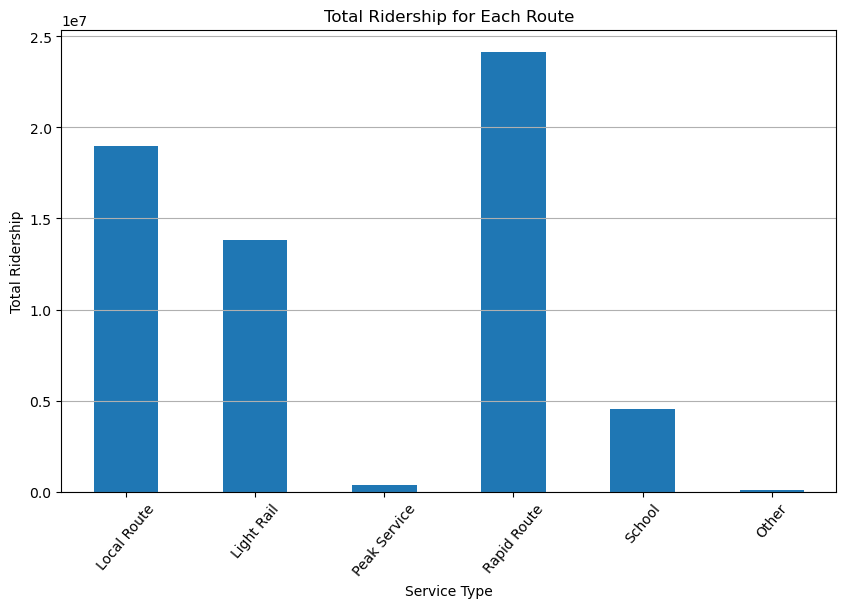

In [261]:
plt.figure(figsize=(10, 6))
total_ridership.plot(kind='bar')
plt.title('Total Ridership for Each Route')
plt.xlabel('Service Type')
plt.ylabel('Total Ridership')
plt.xticks(rotation=50)
plt.grid(axis='y')
plt.show()

In [262]:
average_peak_service = df['Peak Service'].mean()
print(f"AVERAGE PEAK SERVICE USAGE: {average_peak_service}")


AVERAGE PEAK SERVICE USAGE: 179.5813347236705


In [263]:
highest_ridership_day = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1).idxmax()
highest_ridership_value = df.loc[highest_ridership_day].sum()

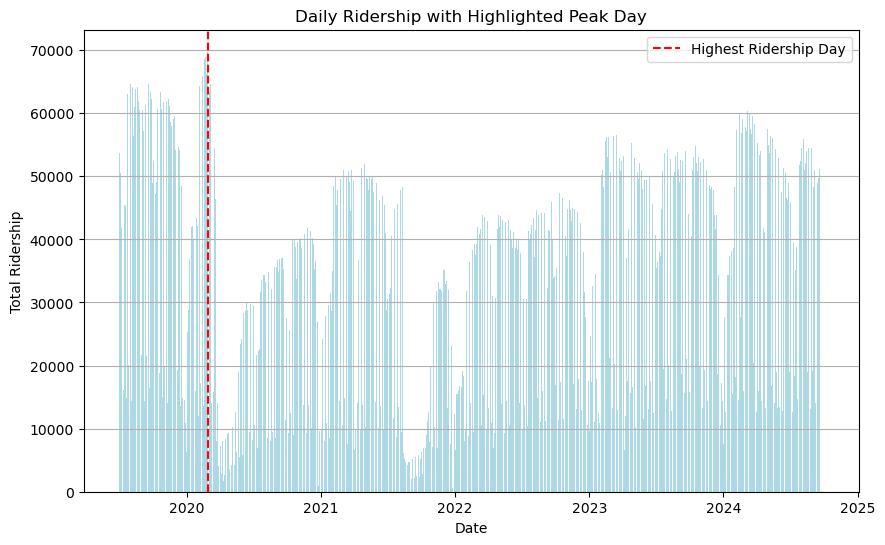

In [264]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1), color='lightblue')
plt.axvline(x=highest_ridership_day, color='red', linestyle='--', label='Highest Ridership Day')
plt.title('Daily Ridership with Highlighted Peak Day')
plt.xlabel('Date')
plt.ylabel('Total Ridership')
plt.legend()
plt.grid(axis='y')
plt.show()

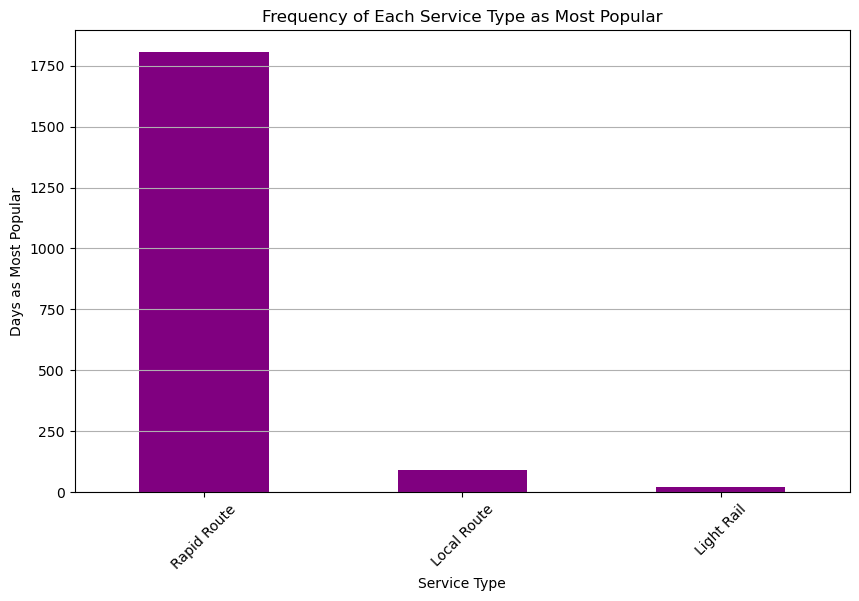

In [265]:
most_popular_service = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].idxmax(axis=1)
popular_service_counts = most_popular_service.value_counts()
plt.figure(figsize=(10, 6))
popular_service_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Each Service Type as Most Popular')
plt.xlabel('Service Type')
plt.ylabel('Days as Most Popular')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

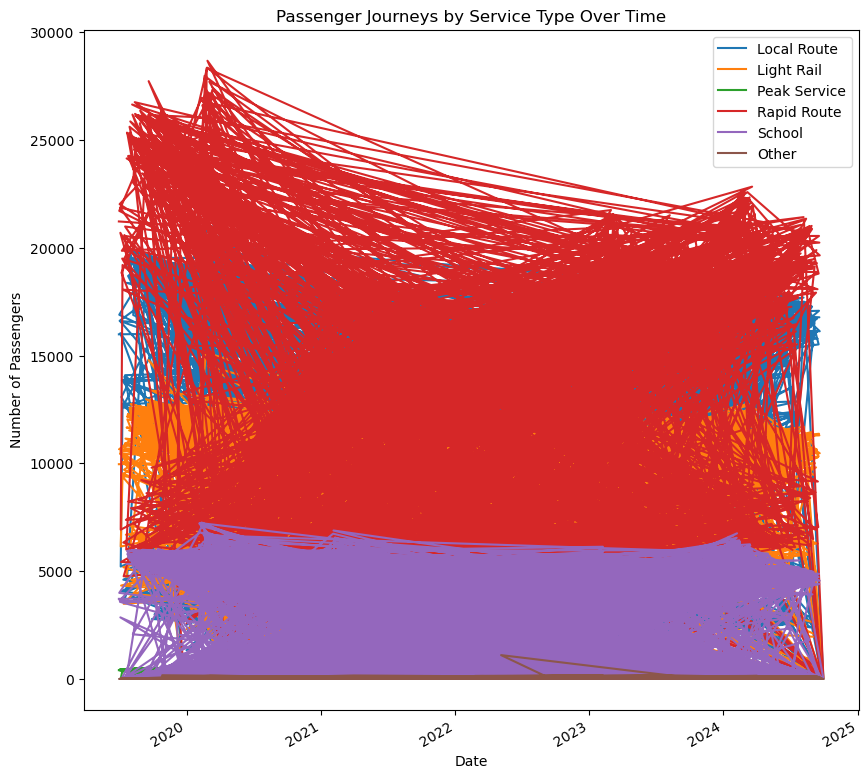

In [266]:
df.plot(figsize=(10, 10))
plt.title("Passenger Journeys by Service Type Over Time")
plt.ylabel("Number of Passengers")
plt.xlabel("Date")
plt.show()

In [267]:
!pip install prophet

12:01:32 - cmdstanpy - INFO - Chain [1] start processing


Forecasting Local Route...


12:01:32 - cmdstanpy - INFO - Chain [1] done processing


Forecasting Light Rail...


12:01:33 - cmdstanpy - INFO - Chain [1] start processing
12:01:33 - cmdstanpy - INFO - Chain [1] done processing
12:01:34 - cmdstanpy - INFO - Chain [1] start processing


Forecasting Peak Service...


12:01:34 - cmdstanpy - INFO - Chain [1] done processing
12:01:35 - cmdstanpy - INFO - Chain [1] start processing


Forecasting Rapid Route...


12:01:35 - cmdstanpy - INFO - Chain [1] done processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing


Forecasting School...


12:01:36 - cmdstanpy - INFO - Chain [1] done processing


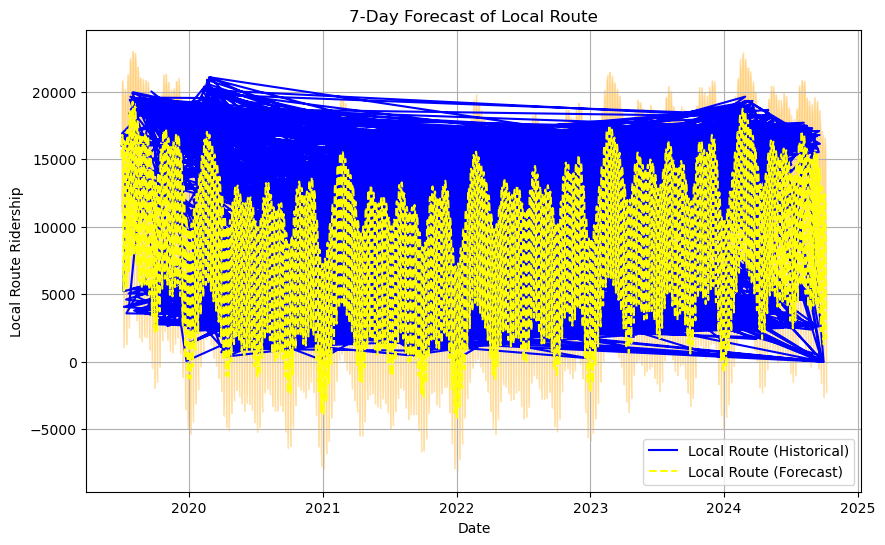

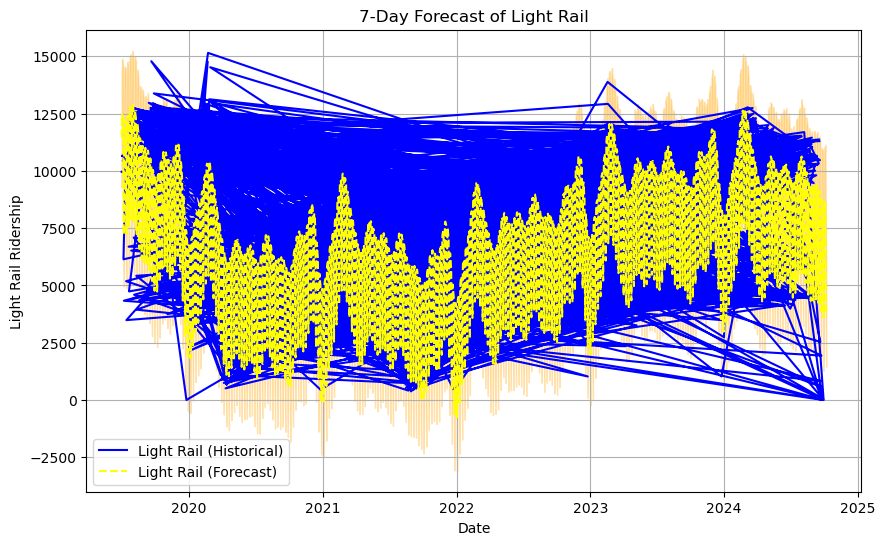

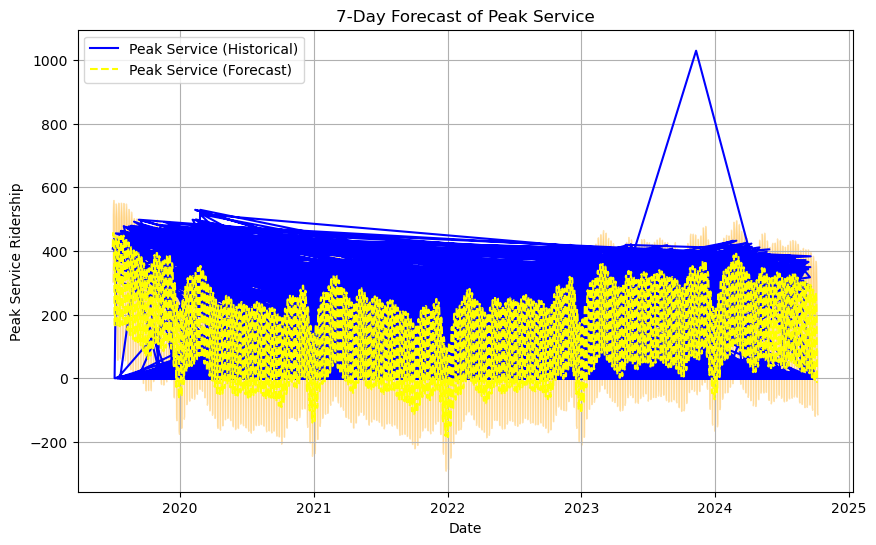

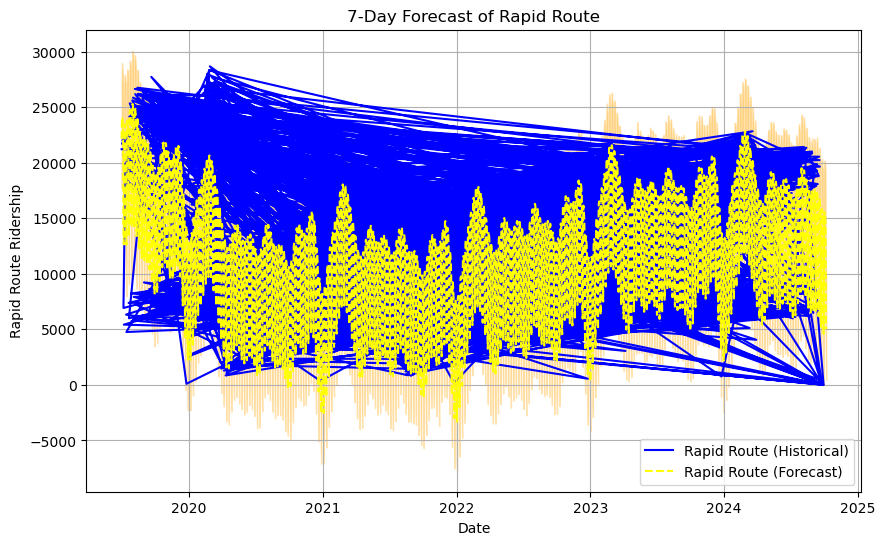

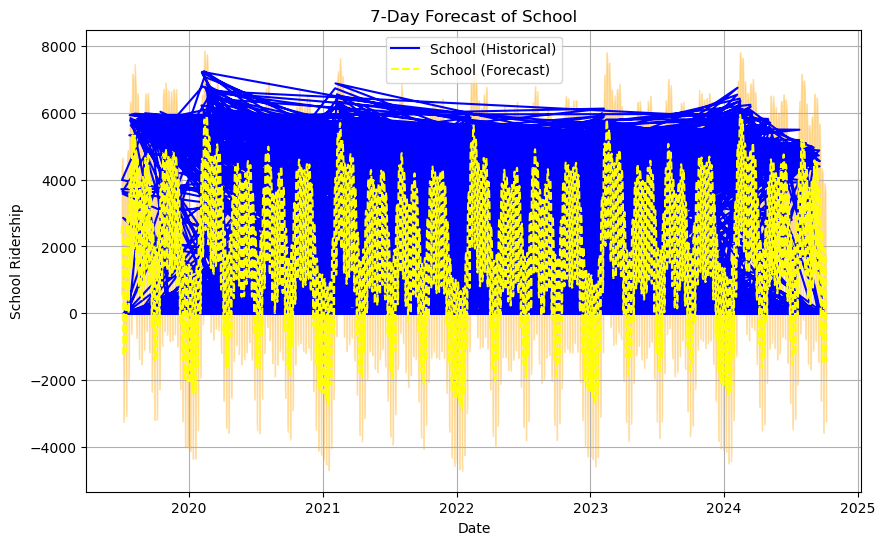

In [268]:
from prophet import Prophet
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys.csv')
df.columns = df.columns.str.strip()
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
    df = df.dropna(subset=['Date'])
    forecast_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
    missing_cols = [col for col in forecast_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in the dataset: {missing_cols}")
    def forecast_with_prophet(df, column):
        prophet_df = pd.DataFrame({'ds': df['Date'], 'y': df[column]})
        model = Prophet()
        model.fit(prophet_df)
        future = model.make_future_dataframe(periods=7)
        forecast = model.predict(future)
        return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecasts = {}

    for column in forecast_columns:
        print(f"Forecasting {column}...")
        forecasts[column] = forecast_with_prophet(df, column)
    for column in forecast_columns:
        forecast = forecasts[column]
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df[column], label=f'{column} (Historical)', color='blue')
        plt.plot(forecast['ds'], forecast['yhat'], label=f'{column} (Forecast)', linestyle='--', color='yellow')
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)
        plt.xlabel('Date')
        plt.ylabel(f'{column} Ridership')
        plt.title(f'7-Day Forecast of {column}')
        plt.legend()
        plt.grid(True)
        plt.show()

else:
    raise KeyError("The 'Date' column is missing from the dataset.")
       